In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Codes/JNU" 
'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n%cd "/content/drive/MyDrive/Codes/JNU" \n'

In [1]:
import os
import scipy
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("tab10")

In [2]:
print(f"scipy: {scipy.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns .__version__}")

scipy: 1.4.1
numpy: 1.19.5
pandas: 1.1.5
seaborn: 0.11.2


## JNU Data Generator

1. Download the JNU dataset [here.](https://engineering.case.edu/bearingdatacenter/download-data-file)


# Load data

In [3]:
!pip install datasets

In [4]:
from tqdm import tqdm
import datasets
from glob import glob #finds all the pathnames matching a specified pattern according to the rules used
import pandas as pd
import os , scipy.io # os = if you want to manipulate paths
from tqdm import tqdm #create progress bars and estimate TTC (Time To Completion)
import numpy as np
#import torch
from scipy.io import loadmat
import pickle
from scipy import signal
import scipy.stats as ss

path_cwd = os.getcwd() 

data_directory = "/JNU"


In [5]:
## Get all .csv in JNU directory
path = glob(os.path.join(path_cwd,"JNU","**","*.csv"), recursive=True)
print(path)

[]


In [6]:
#!ls


In [10]:

def data_load(filename,label):
    '''
    This function is mainly used to generate test data and training data.
    filename:Data location
    '''
    fl = np.loadtxt(filename)
    fl = fl.reshape(-1,1)
    data=[] 
    lab=[]
    start,end=0,signal_size
    while end <= fl.shape[0]:
        signal_data = fl[start:end]
        signal_data = np.fft.fft(signal_data)
        signal_data = np.abs(signal_data) / len(signal_data)
        signal_data = signal_data[range(int(signal_data.shape[0] / 2))]
        signal_data = signal_data.reshape(-1,1)
                      #mean                 #variance             #rms                            #peak to peak                               #max aplitude
        #signal_data = [np.mean(signal_data),np.var(signal_data), np.sqrt(np.mean(signal_data**2)), np.amax(signal_data)-np.amin(signal_data), np.amax(signal_data) ]        
        signal_data = [np.mean(signal_data), np.var(signal_data), np.sqrt(np.mean(signal_data**2)), np.amax(signal_data)-np.amin(signal_data), np.amax(signal_data), np.amax(signal_data)/np.sqrt(np.mean(np.power(signal_data, 2))),  ss.kurtosis(signal_data[0]),  ss.skew(signal_data[0]) ]
        data.append(signal_data)
        lab.append(label)
        start += signal_size
        end += signal_size
    return data, lab


In [11]:
from glob import glob #finds all the pathnames matching a specified pattern according to the rules used
import pandas as pd
import os , scipy.io # os = if you want to manipulate paths
from tqdm import tqdm #create progress bars and estimate TTC (Time To Completion)
import numpy as np
#import torch
from scipy.io import loadmat
#from sklearn.model_selection import train_test_split

signal_size = 1024

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

#Three working conditions
WC1 = ["ib600_2.csv","n600_3_2.csv","ob600_2.csv","tb600_2.csv"] # Rotating Speed 600
WC2 = ["ib800_2.csv","n800_3_2.csv","ob800_2.csv","tb800_2.csv"] # Rotating Speed 800
WC3 = ["ib1000_2.csv","n1000_3_2.csv","ob1000_2.csv","tb1000_2.csv"] # Rotating Speed 1000

label1 = [i for i in range(0,4)]
label2 = [i for i in range(4,8)]
label3 = [i for i in range(8,12)]


data = []
lab = []


for i in tqdm(range(len(WC1))):
  path1 = os.path.join(path_cwd,WC1[i])
  data1, lab1 = data_load(path1,label=label1[i])
  data += data1
  lab +=lab1

for j in tqdm(range(len(WC2))):
  path2 = os.path.join(path_cwd,WC2[j])
  data2, lab2 = data_load(path2,label=label2[j])
  data += data2
  lab += lab2

for k in tqdm(range(len(WC3))):
  path3 = os.path.join(path_cwd,WC3[k])
  data3, lab3 = data_load(path3,label=label3[k])
  data += data3
  lab += lab3

#data = np.reshape(data, (-1, 43950) )  



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.57s/it]


In [12]:
np.savez('JNU_quantum_8FFT.npz', data=np.array(data), label=np.array(lab))

In [7]:
dataset = np.load('JNU_quantum_8.npz')

In [8]:

X = dataset['data']
y = dataset['label']

print(X)

[[ 2.83516599e-02  1.12541455e-02  1.09808753e-01 ...  3.30119404e+00
  -3.00000000e+00  0.00000000e+00]
 [-3.20057746e-02  1.00410017e-02  1.05192069e-01 ...  2.87569209e+00
  -3.00000000e+00  0.00000000e+00]
 [-4.91707295e-03  1.13053240e-02  1.06440132e-01 ...  3.81829667e+00
  -3.00000000e+00  0.00000000e+00]
 ...
 [-4.19034527e-02  2.47335299e-02  1.62755735e-01 ...  4.08077786e+00
  -3.00000000e+00  0.00000000e+00]
 [-9.31436463e-03  2.86419213e-01  5.35262525e-01 ...  1.62357714e+01
  -3.00000000e+00  0.00000000e+00]
 [ 3.29667116e-02  1.48075604e+00  1.21730967e+00 ...  9.35259141e+00
  -3.00000000e+00  0.00000000e+00]]


In [9]:
print(X.shape)

(8790, 8)


In [10]:
'''
data_df = pd.DataFrame(np.hstack((X ,y.reshape(-1,1)) ), columns= ["Mean", "Variance", "RMS_amplitude", "peak to peak", "Max_amplitude" ,"category" ])


sns.pairplot(data_df, hue = "category")
'''

'\ndata_df = pd.DataFrame(np.hstack((X ,y.reshape(-1,1)) ), columns= ["Mean", "Variance", "RMS_amplitude", "peak to peak", "Max_amplitude" ,"category" ])\n\n\nsns.pairplot(data_df, hue = "category")\n'

#PQC

## Hybrid Quantum Classical Machine Learning - Framework 1

* We shall perform health state diagnostics of ball bearings (__CWRU__) with __TensorFlow Quantum (TFQ)__
* For that, we use the framework 1 that is comprised of 4 steps as illustrated in the following figure.


#### Framework 1
* It consists of four steps:
    * Preprocessing data step:
        * It could be the normalization of images to a color-map range or dimensionality reductionof raw multi-sensor data 
        * Then, the processed classical data is encoded into quantum circuits via an encoding schema
    * Parameterized Quantum Circuit (PQC):
        * The quantum encoded data is fed to a PQC
        * It consists of a user defined quantum circuit composed of multiple gates that can accept external, free parameters, and that will be later optimized in the training phase
    * Measurement:
        * It returns the now processed quantum data to classical data
    * Classical (deep) Neural Network:
        * It receives the classical data from the measured PQC
        * It performs the required fault diagnostics / prognostics or RUL prediction

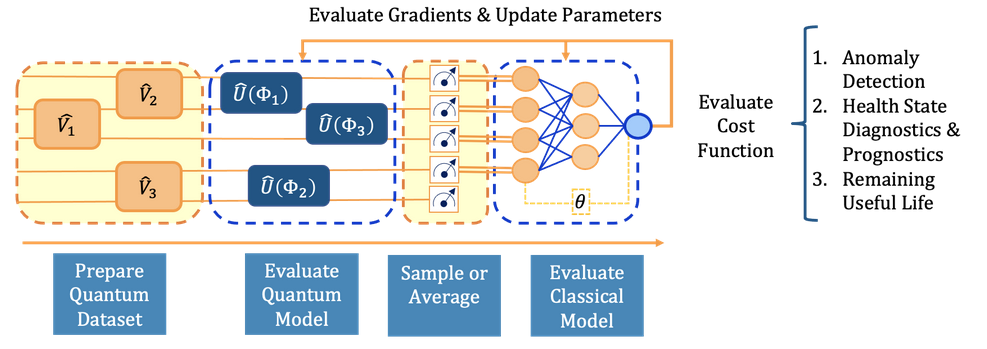

In [11]:
#!pip install --upgrade pip

In [12]:
#!pip install tensorflow==2.7.0

In [13]:
#!pip install tensorflow-quantum==0.7.2

In [14]:
# Update package resources to account for version changes.
#import importlib, pkg_resources
#importlib.reload(pkg_resources)

In [15]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq  #simulador de circuitos quanticos do tfq
import sympy #biblioteca de matematica simbolica que o tfq utiliza para denominar os parâmetros dentro do PQC que vão ser aprendidos durante o treinamento
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit #to print the circuit

### Classical Data Preprocessing

In [16]:
# Code a function to perform preprocessing on the classical dataset
def prepare_classic_dataset():
    
    #np.load('CWRU_Quantum_Slice.npz') #carregar os dados

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)
    
    scaler = MinMaxScaler(feature_range = [0, np.pi])                                                  #o valor de cada característica é classificada como o angulo do qubit, portanto, em vez de normalizar entre 0 e 1, normalizamos entre 0 e pi
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)                                                                  #só o transform, se não vai contaminar os dados de teste
     
    y_train = np.eye(12)[y_train]                                                                      #one hot encoder para otimizar, tem 3 características dos dados de treinamento (0, 1, 2 - modos de falha)
    y_test = np.eye(12)[y_test]

    
    return x_train, x_test, y_train, y_test


In [17]:

x_train, x_test, y_train, y_test = prepare_classic_dataset()

print(x_train[0])
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

#precisamos codificar as 5 características para qubits

[0.89346406 0.01774036 0.15925184 0.04587952 0.03933127 0.15666299
 0.         0.        ]
(6153, 8)
(6153, 12)
(2637, 12)


### Quantum Data Preprocessing: Encoding Schemas
* One of the main challenges when working with quantum circuits and algorithms is to encode real-valued data into qubits
* The simpler schema is called __Angle Encoding__:
    * It generates a circuit that takes as input N qubits set in a |0⟩ state and a N-dimensional real valued vector
    * It outputs a system of N qubits with the classical data encoded into their phases
    * For this, the operation that is performed is as follows:

$$ \vec{x} \rightarrow |\psi\rangle = S(x_0) \otimes S(x_1) \otimes \cdots \otimes S(x_{N-1}) $$ 
    
where $S$ represents the following operation performed to each element of the classical vector:

$$ S(x_i) = \cos \left( \frac{\pi}{2} x_i \right) |0\rangle + \sin \left( \frac{\pi}{2} x_i \right) |1\rangle $$

* Note that this encoding schema uses $N$ qubits to encode a $N$-dimensional vector which values lie in a given interval (e.g., $[0,1]$)
    

In [18]:
# Code a function to perform Angle Encoding of the preprocssed classical data

#Angle encoding é o mais rápido, mas é o menos eficiente.
#mapeamento de um vetor 1x5 para o estado quantico |psi>, a partir do produto tensorial entre cada uma das caracteristicas. 
#codificado dentro do angulo teta do qubit com relação ao |0>
#é como se fosse um Hadamard forçado, onde o angulo que se tem de rotação é proporcional ao valor da característica sendo codificada.

def prepare_quantum_dataset(x):

    #a partir de circuito entre o cirq e o qskit é parecida  
    q = cirq.GridQubit.rect(1, len(x)) #Semelhante ao QuantumRegister on qiskit 
    #no GridQubit cria uma matriz de multiplos qubits, nesse caso um vetor 1x5
    
    #Operações

    #as operações no angle encoding são semelhantes a uma rotação ry
    
    ops = [cirq.ry(2 * x[i]).on(q[i]) for i in range(len(x))] #ry operando "on" qubit i dentro da lista
    #na esfera de blohr que tem no cirq do tfq, o angulo que se define é 2*pi/2. portanto, se quer uma rotação de pi/2 tem que multiplicar o angulo por 2
    #se quer o x multiplicado por meia volta, tem que considerar a volta inteira

    circuit = cirq.Circuit(ops) #equivalente a classe quantumcircuit do qiskit
    
    return circuit
    

[0.89346406 0.01774036 0.15925184 0.04587952 0.03933127 0.15666299
 0.         0.        ]


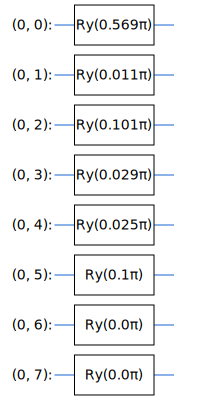

In [19]:
# Do the actual quantum dataset preparation from the preprocessed classical data

x_train_q = [prepare_quantum_dataset(x) for x in x_train] #faz um for pq a função "prepare_quantum_dataset" só processa um registro por vez
x_test_q = [prepare_quantum_dataset(x) for x in x_test]

print(x_train[0])
SVGCircuit(x_train_q[0]) #visualizar o circuito

#os qubits não estão em sobreposição, nem entrelaçados

### Parameterized Quantum Circuit (PQC)

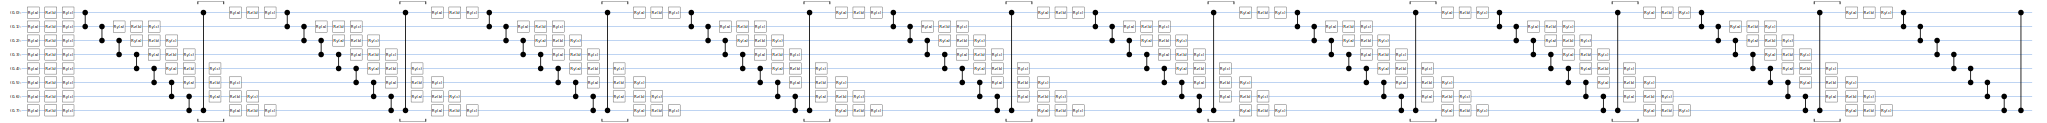

In [20]:
# Implement the PQC

n_layers = 10
qubits = X.shape[1]

params = sympy.symbols('a b c')  #Semelhante ao qskit, são parametros simbolicos que vao ser aprendidos
#vou montar um circuito em que serão feitas 3 rotações em cada um dos qubits
#a = angulo de rotação em y
#b = angulo de rotação em x
#c = angulo de rotação em z

q = cirq.GridQubit.rect(1, qubits)

ops = []  #lista vazia de operações, cria o for para serem executadas nos 5 qubits
'''
for j in range(n_layers):
  for i in range(5):
    ops.append(cirq.ry(params[0]).on(q[i]))  #o angulo é parametrizado pq ele vai ser aprendido no treinamento
    ops.append(cirq.rx(params[1]).on(q[i]))
    ops.append(cirq.rz(params[2]).on(q[i]))
    #ops.append(cirq.H(params[3]).on(q[i]))

'''
for j in range(n_layers):
  for i in range(qubits):
      #Euler rotation
      ops.append(cirq.ry(params[0]).on(q[i]))  #o angulo é parametrizado pq ele vai ser aprendido no treinamento
      ops.append(cirq.rz(params[1]).on(q[i]))
      ops.append(cirq.ry(params[2]).on(q[i]))
#'''
#'''
  ops.append(cirq.CZ(q[0], q[1]))
  ops.append(cirq.CZ(q[1], q[2]))
  ops.append(cirq.CZ(q[2], q[3]))
  ops.append(cirq.CZ(q[3], q[4]))
  ops.append(cirq.CZ(q[4], q[5]))
  ops.append(cirq.CZ(q[5], q[6]))
  ops.append(cirq.CZ(q[6], q[7]))
  ops.append(cirq.CZ(q[7], q[0]))
#'''



#Arquitetura das portas de emaranhamento
'''
  ops.append(cirq.CNOT(control=q[0], target=q[1]))
  ops.append(cirq.CNOT(control=q[1], target=q[2]))
  ops.append(cirq.CNOT(control=q[2], target=q[3]))
  ops.append(cirq.CNOT(control=q[3], target=q[4]))
  ops.append(cirq.CNOT(control=q[4], target=q[5]))
  ops.append(cirq.CNOT(control=q[5], target=q[6]))
  ops.append(cirq.CNOT(control=q[6], target=q[7]))
  ops.append(cirq.CNOT(control=q[7], target=q[0]))
'''

'''
  #Without two-qubit gates parameterized
  ops.append(cirq.CZ(q[0], q[1]))
  ops.append(cirq.CZ(q[1], q[2]))
  ops.append(cirq.CZ(q[2], q[3]))
  ops.append(cirq.CZ(q[3], q[4]))
  ops.append(cirq.CZ(q[4], q[5]))
  ops.append(cirq.CZ(q[5], q[6]))
  ops.append(cirq.CZ(q[6], q[7]))
  ops.append(cirq.CZ(q[7], q[0]))
'''



'''
  ops.append(cirq.ISWAP(q[0], q[1]))
  ops.append(cirq.ISWAP(q[1], q[2]))
  ops.append(cirq.ISWAP(q[2], q[3]))
  ops.append(cirq.ISWAP(q[3], q[4]))
  ops.append(cirq.ISWAP(q[4], q[5]))
  ops.append(cirq.ISWAP(q[5], q[6]))
  ops.append(cirq.ISWAP(q[6], q[7]))  
  ops.append(cirq.ISWAP(q[7], q[0]))
'''
model_circuit = cirq.Circuit(ops)

SVGCircuit(model_circuit)  #SVG é a imagem vetorizada do circuito

#Verificar a matriz resultante do circuito.

### Measurement, Classical Neural Net and Hybrid Model

In [21]:
# Code the Hybrid Quantum-Classical Neural Net:
from tensorflow.keras.layers import Input

#criar o modelo sequencial
#iniciou com 5 características, mas sai com 3 - portanto a avaliação na rede é dessas características

nn = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'relu'), 
tf.keras.layers.Dense(12,activation = 'sigmoid')]) #sigmoid // softmax
                          
#nn = tf.keras.Sequential([tf.keras.layers.Dense(10,activation = 'softmax')])

#Camada de entrada, define o shape para ser determinado depois; 
#para poder encaixar circ quanticos ele precisa serializar a string em forma de bits - o ponto de entrada é um bitstring - isso é depois transformado para tensor (isso é uma deficiencia do tensorflow)  
circuit_input = tf.keras.Input(shape = (), dtype = tf.string, name = 'circuits_input')

#Criação das operações de medição 
#O cirq faz as medições a partir da operação de Pauli Z 

measurement_ops = [cirq.Z(q[i]) for i in range(qubits)] 

#cria a camada de circuito quantica, a partir de agora usa tfq - circuito agregado as operações de medição
circuit_layer = tfq.layers.PQC(model_circuit, measurement_ops)


#Junta tudo
#a entrada é quantica, a saída é o nn - PQC do circuit input; 
model = tf.keras.Model(inputs = circuit_input, outputs = nn(circuit_layer(circuit_input)))

model.summary()

print(circuit_layer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
circuits_input (InputLayer)  [(None,)]                 0         
_________________________________________________________________
pqc (PQC)                    (None, 8)                 3         
_________________________________________________________________
sequential (Sequential)      (None, 12)                2112      
Total params: 2,115
Trainable params: 2,115
Non-trainable params: 0
_________________________________________________________________


### Training the Hybrid Quantum - Classical Model

In [22]:
# define our early stopping
'''
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)
'''

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', mode='max', patience = 50)

In [ ]:
# Training

last_value = []
best_value = []

from tensorflow.keras import optimizers
#o tf assume que todos os parametros vao ser otimizados, no pytorch nao (é mais flexivel)
import time
start = time.time()

for i in range(5):
    
    # Code the Hybrid Quantum-Classical Neural Net:
    #from tensorflow.keras.layers import Input

    #criar o modelo sequencial
    #iniciou com 5 características, mas sai com 3 - portanto a avaliação na rede é dessas características

    nn = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'relu'), 
    tf.keras.layers.Dense(12,activation = 'sigmoid')]) #sigmoid // softmax

    #nn = tf.keras.Sequential([tf.keras.layers.Dense(10,activation = 'softmax')])

    #Camada de entrada, define o shape para ser determinado depois; 
    #para poder encaixar circ quanticos ele precisa serializar a string em forma de bits - o ponto de entrada é um bitstring - isso é depois transformado para tensor (isso é uma deficiencia do tensorflow)  
    circuit_input = tf.keras.Input(shape = (), dtype = tf.string, name = 'circuits_input')

    #Criação das operações de medição 
    #O cirq faz as medições a partir da operação de Pauli Z 

    measurement_ops = [cirq.Z(q[i]) for i in range(qubits)] 

    #cria a camada de circuito quantica, a partir de agora usa tfq - circuito agregado as operações de medição
    circuit_layer = tfq.layers.PQC(model_circuit, measurement_ops)


    #Junta tudo
    #a entrada é quantica, a saída é o nn - PQC do circuit input; 
    model = tf.keras.Model(inputs = circuit_input, outputs = nn(circuit_layer(circuit_input)))

    #model.summary()

    print(circuit_layer)

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(x = tfq.convert_to_tensor(x_train_q), y = y_train, epochs = 100, verbose = 1, validation_split = 0.1) #, callbacks=[es])
    
    acc = history.history['val_accuracy']
    bestacc = max(acc)
    best_value.append(bestacc)
    last_value.append(acc[99])

    i+=1


    # Evaluate the model on the test dataset
    loss, acc = model.evaluate(tfq.convert_to_tensor(x_test_q), y_test, verbose = 2)
    
    #acc_matrix.append(acc)

end = time.time()
print("Run time:", end - start)


Train on 5537 samples, validate on 616 samples
Epoch 1/100
5537/5537 [==============================] - 35s 6ms/sample - loss: 1.7071 - accuracy: 0.4125 - val_loss: 1.4551 - val_accuracy: 0.5682
Epoch 2/100
5537/5537 [==============================] - 34s 6ms/sample - loss: 1.3487 - accuracy: 0.5684 - val_loss: 1.3438 - val_accuracy: 0.5422
Epoch 3/100
5537/5537 [==============================] - 37s 7ms/sample - loss: 1.2406 - accuracy: 0.6094 - val_loss: 1.2311 - val_accuracy: 0.6071
Epoch 4/100
5537/5537 [==============================] - 37s 7ms/sample - loss: 1.1620 - accuracy: 0.6206 - val_loss: 1.1497 - val_accuracy: 0.6185
Epoch 5/100
5537/5537 [==============================] - 38s 7ms/sample - loss: 1.1176 - accuracy: 0.6251 - val_loss: 1.1198 - val_accuracy: 0.6218
Epoch 6/100
5537/5537 [==============================] - 38s 7ms/sample - loss: 1.0836 - accuracy: 0.6381 - val_loss: 1.1019 - val_accuracy: 0.6169
Epoch 7/100
5537/5537 [==============================] - 45s 8ms/

In [ ]:
print("MaxBest: ",max(best_value))
print("MeanBest: ",np.mean(best_value))

print("MaxLast:", max(last_value))
print("MeanLast: ",np.mean(last_value))

### Testing the Hybrid Quantum - Classical Model

In [ ]:
print(acc_matrix)

[0.6196435, 0.62381494, 0.6348123, 0.63253695, 0.6067501, 0.64012134, 0.64050055, 0.64050055, 0.63026166, 0.56806976, 0.62988245, 0.649981, 0.6128176, 0.5585893, 0.63253695, 0.60637087, 0.62153965, 0.63026166, 0.61395526, 0.6348123, 0.63102007, 0.64770573, 0.620402, 0.6492226, 0.6192643, 0.63253695, 0.6351915, 0.6329162, 0.62419415, 0.63215774]


In [ ]:
# Evaluate the model on the test dataset
model.evaluate(tfq.convert_to_tensor(x_test_q), y_test)

y_test_ne = np.argmax(y_test, axis = 1)
y_test_pred_ne = np.argmax(model.predict(tfq.convert_to_tensor(x_test_q)), axis = 1)

cm = confusion_matrix(y_test_ne, y_test_pred_ne)

print(cm)

In [ ]:

# Plot the confusion matrix

import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('JNU Classification Case Study: Test Data');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


#from sklearn.metrics import plot_confusion_matrix
#from utils import plot_confusion_matrix

#plot_confusion_matrix(cm, ['ND', 'OR', 'IR'], 0, title = 'CWRU Classification Case Study: Test Data', normalize = True)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("JNU Classification Case Study")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("JNU Classification Case Study")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.show()

#CLASSICAL MLP


In [25]:
print(x_train.shape)
feature_vector_length = x_train.shape[1]
feature_vector_length

(6153, 5)


5

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [28]:
#configurate the model

model = tensorflow.keras.models.Sequential()

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

model.add(Dense(50, input_shape=input_shape, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

Feature shape: (5,)


In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', mode='max', patience = 30)

In [33]:
last_value = []
best_value = []

from tensorflow.keras import optimizers
#o tf assume que todos os parametros vao ser otimizados, no pytorch nao (é mais flexivel)
import time
start = time.time()

for i in range(5):
    history = model.fit(x_train, y_train, epochs = 100, verbose=1, validation_split = 0.1)#, callbacks = [es] )  

    acc = history.history['val_accuracy']
    bestacc = max(acc)
    best_value.append(bestacc)
    last_value.append(acc[99])

    i+=1


end = time.time()
print("Run time:", end - start)




Train on 5537 samples, validate on 616 samples
Epoch 1/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1471 - accuracy: 0.9445 - val_loss: 0.1520 - val_accuracy: 0.9417
Epoch 2/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1471 - accuracy: 0.9445 - val_loss: 0.1519 - val_accuracy: 0.9421
Epoch 3/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1471 - accuracy: 0.9446 - val_loss: 0.1525 - val_accuracy: 0.9420
Epoch 4/100
5537/5537 [==============================] - 0s 43us/sample - loss: 0.1471 - accuracy: 0.9442 - val_loss: 0.1526 - val_accuracy: 0.9416
Epoch 5/100
5537/5537 [==============================] - 0s 49us/sample - loss: 0.1469 - accuracy: 0.9446 - val_loss: 0.1524 - val_accuracy: 0.9421
Epoch 6/100
5537/5537 [==============================] - 0s 48us/sample - loss: 0.1469 - accuracy: 0.9443 - val_loss: 0.1523 - val_accuracy: 0.9416
Epoch 7/100
5537/5537 [==============================] - 0s 46us/

Epoch 56/100
5537/5537 [==============================] - 0s 48us/sample - loss: 0.1458 - accuracy: 0.9448 - val_loss: 0.1507 - val_accuracy: 0.9426
Epoch 57/100
5537/5537 [==============================] - 0s 47us/sample - loss: 0.1459 - accuracy: 0.9450 - val_loss: 0.1502 - val_accuracy: 0.9428
Epoch 58/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1458 - accuracy: 0.9450 - val_loss: 0.1505 - val_accuracy: 0.9428
Epoch 59/100
5537/5537 [==============================] - 0s 48us/sample - loss: 0.1458 - accuracy: 0.9449 - val_loss: 0.1507 - val_accuracy: 0.9425
Epoch 60/100
5537/5537 [==============================] - 0s 38us/sample - loss: 0.1458 - accuracy: 0.9448 - val_loss: 0.1508 - val_accuracy: 0.9430
Epoch 61/100
5537/5537 [==============================] - 0s 39us/sample - loss: 0.1459 - accuracy: 0.9450 - val_loss: 0.1507 - val_accuracy: 0.9429
Epoch 62/100
5537/5537 [==============================] - 0s 43us/sample - loss: 0.1458 - accuracy: 0.9451

Epoch 11/100
5537/5537 [==============================] - 0s 47us/sample - loss: 0.1451 - accuracy: 0.9448 - val_loss: 0.1498 - val_accuracy: 0.9433
Epoch 12/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1449 - accuracy: 0.9452 - val_loss: 0.1497 - val_accuracy: 0.9433
Epoch 13/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1450 - accuracy: 0.9451 - val_loss: 0.1501 - val_accuracy: 0.9424
Epoch 14/100
5537/5537 [==============================] - 0s 47us/sample - loss: 0.1449 - accuracy: 0.9453 - val_loss: 0.1505 - val_accuracy: 0.9428
Epoch 15/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1449 - accuracy: 0.9450 - val_loss: 0.1500 - val_accuracy: 0.9432
Epoch 16/100
5537/5537 [==============================] - 0s 44us/sample - loss: 0.1450 - accuracy: 0.9451 - val_loss: 0.1497 - val_accuracy: 0.9426
Epoch 17/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1450 - accuracy: 0.9451

Epoch 66/100
5537/5537 [==============================] - 0s 49us/sample - loss: 0.1443 - accuracy: 0.9454 - val_loss: 0.1488 - val_accuracy: 0.9429
Epoch 67/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1443 - accuracy: 0.9454 - val_loss: 0.1497 - val_accuracy: 0.9439
Epoch 68/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1444 - accuracy: 0.9453 - val_loss: 0.1495 - val_accuracy: 0.9440
Epoch 69/100
5537/5537 [==============================] - 0s 49us/sample - loss: 0.1444 - accuracy: 0.9457 - val_loss: 0.1497 - val_accuracy: 0.9432
Epoch 70/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1444 - accuracy: 0.9454 - val_loss: 0.1487 - val_accuracy: 0.9440
Epoch 71/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1443 - accuracy: 0.9456 - val_loss: 0.1492 - val_accuracy: 0.9445
Epoch 72/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1442 - accuracy: 0.9455

Epoch 21/100
5537/5537 [==============================] - 0s 46us/sample - loss: 0.1439 - accuracy: 0.9455 - val_loss: 0.1485 - val_accuracy: 0.9441
Epoch 22/100
5537/5537 [==============================] - 0s 45us/sample - loss: 0.1438 - accuracy: 0.9457 - val_loss: 0.1479 - val_accuracy: 0.9447
Epoch 23/100
5537/5537 [==============================] - 0s 47us/sample - loss: 0.1441 - accuracy: 0.9454 - val_loss: 0.1482 - val_accuracy: 0.9437
Epoch 24/100
5537/5537 [==============================] - 0s 48us/sample - loss: 0.1438 - accuracy: 0.9455 - val_loss: 0.1484 - val_accuracy: 0.9443
Epoch 25/100
5537/5537 [==============================] - 0s 44us/sample - loss: 0.1437 - accuracy: 0.9455 - val_loss: 0.1483 - val_accuracy: 0.9440
Epoch 26/100
5537/5537 [==============================] - 0s 50us/sample - loss: 0.1437 - accuracy: 0.9453 - val_loss: 0.1488 - val_accuracy: 0.9440
Epoch 27/100
5537/5537 [==============================] - 0s 47us/sample - loss: 0.1437 - accuracy: 0.9455

Epoch 76/100
5537/5537 [==============================] - 0s 43us/sample - loss: 0.1434 - accuracy: 0.9457 - val_loss: 0.1484 - val_accuracy: 0.9444
Epoch 77/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1434 - accuracy: 0.9454 - val_loss: 0.1479 - val_accuracy: 0.9443
Epoch 78/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1433 - accuracy: 0.9457 - val_loss: 0.1483 - val_accuracy: 0.9440
Epoch 79/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1434 - accuracy: 0.9455 - val_loss: 0.1480 - val_accuracy: 0.9443
Epoch 80/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1433 - accuracy: 0.9452 - val_loss: 0.1488 - val_accuracy: 0.9445
Epoch 81/100
5537/5537 [==============================] - 0s 40us/sample - loss: 0.1434 - accuracy: 0.9457 - val_loss: 0.1481 - val_accuracy: 0.9441
Epoch 82/100
5537/5537 [==============================] - 0s 42us/sample - loss: 0.1432 - accuracy: 0.9455

Epoch 31/100
5537/5537 [==============================] - 0s 29us/sample - loss: 0.1431 - accuracy: 0.9458 - val_loss: 0.1483 - val_accuracy: 0.9444
Epoch 32/100
5537/5537 [==============================] - 0s 31us/sample - loss: 0.1431 - accuracy: 0.9454 - val_loss: 0.1478 - val_accuracy: 0.9436
Epoch 33/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1431 - accuracy: 0.9455 - val_loss: 0.1480 - val_accuracy: 0.9441
Epoch 34/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1430 - accuracy: 0.9458 - val_loss: 0.1480 - val_accuracy: 0.9445
Epoch 35/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1429 - accuracy: 0.9456 - val_loss: 0.1475 - val_accuracy: 0.9449
Epoch 36/100
5537/5537 [==============================] - 0s 36us/sample - loss: 0.1429 - accuracy: 0.9456 - val_loss: 0.1479 - val_accuracy: 0.9444
Epoch 37/100
5537/5537 [==============================] - 0s 36us/sample - loss: 0.1429 - accuracy: 0.9456

Epoch 86/100
5537/5537 [==============================] - 0s 32us/sample - loss: 0.1428 - accuracy: 0.9458 - val_loss: 0.1477 - val_accuracy: 0.9447
Epoch 87/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1425 - accuracy: 0.9456 - val_loss: 0.1477 - val_accuracy: 0.9440
Epoch 88/100
5537/5537 [==============================] - 0s 36us/sample - loss: 0.1425 - accuracy: 0.9456 - val_loss: 0.1475 - val_accuracy: 0.9444
Epoch 89/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1426 - accuracy: 0.9458 - val_loss: 0.1481 - val_accuracy: 0.9437
Epoch 90/100
5537/5537 [==============================] - 0s 36us/sample - loss: 0.1427 - accuracy: 0.9454 - val_loss: 0.1474 - val_accuracy: 0.9444
Epoch 91/100
5537/5537 [==============================] - 0s 37us/sample - loss: 0.1426 - accuracy: 0.9458 - val_loss: 0.1478 - val_accuracy: 0.9447
Epoch 92/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1427 - accuracy: 0.9457

Epoch 41/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1423 - accuracy: 0.9457 - val_loss: 0.1469 - val_accuracy: 0.9447
Epoch 42/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1424 - accuracy: 0.9460 - val_loss: 0.1475 - val_accuracy: 0.9444
Epoch 43/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1422 - accuracy: 0.9456 - val_loss: 0.1485 - val_accuracy: 0.9436
Epoch 44/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1424 - accuracy: 0.9457 - val_loss: 0.1474 - val_accuracy: 0.9451
Epoch 45/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1423 - accuracy: 0.9456 - val_loss: 0.1471 - val_accuracy: 0.9449
Epoch 46/100
5537/5537 [==============================] - 0s 33us/sample - loss: 0.1423 - accuracy: 0.9455 - val_loss: 0.1469 - val_accuracy: 0.9447
Epoch 47/100
5537/5537 [==============================] - 0s 33us/sample - loss: 0.1424 - accuracy: 0.9457

Epoch 96/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1421 - accuracy: 0.9457 - val_loss: 0.1472 - val_accuracy: 0.9443
Epoch 97/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1421 - accuracy: 0.9457 - val_loss: 0.1473 - val_accuracy: 0.9451
Epoch 98/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1420 - accuracy: 0.9458 - val_loss: 0.1466 - val_accuracy: 0.9443
Epoch 99/100
5537/5537 [==============================] - 0s 34us/sample - loss: 0.1420 - accuracy: 0.9458 - val_loss: 0.1470 - val_accuracy: 0.9447
Epoch 100/100
5537/5537 [==============================] - 0s 35us/sample - loss: 0.1420 - accuracy: 0.9460 - val_loss: 0.1471 - val_accuracy: 0.9441
Run time: 112.28919672966003


In [34]:
print("MaxBest: ",max(best_value))
print("MeanBest: ",np.mean(best_value))

print("MaxLast:", max(last_value))
print("MeanLast: ",np.mean(last_value))

MaxBest:  0.94548154
MeanBest:  0.944805
MaxLast: 0.9448052
MeanLast:  0.94402045


In [ ]:
score = model.evaluate(x_test, y_test)


2637/2637 [==============================] - 0s 116us/sample - loss: 0.2296 - accuracy: 0.9161


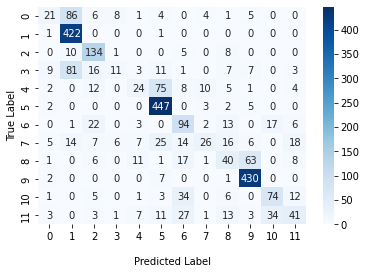

In [ ]:
previsao = model.predict(x_test)

cm = confusion_matrix(y_test.argmax(1), previsao.argmax(1))

# Plot the confusion matrix

import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.4g')


ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

plt.show()

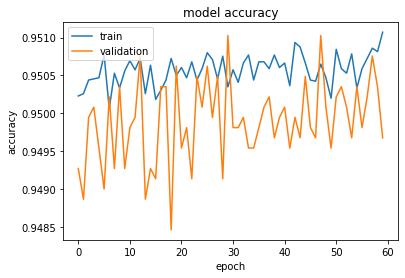

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



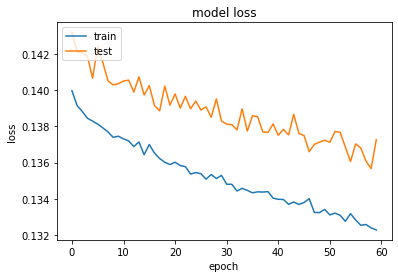

In [ ]:
# Plota gráfico de Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#FRAMEWORK 2


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier( max_iter=1000)

# let's fit the training data to our model
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(x_train)
print(accuracy_score(predictions_train, y_train))
predictions_test = mlp.predict(x_test)
print(accuracy_score(predictions_test, y_test))

0.606533398342272
0.6003033750474024


In [ ]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(x_train)
print(loss_score(predictions_train, y_train))
predictions_test = mlp.predict(x_test)
print(loss_score(predictions_test, y_test))

NameError: name 'loss_score' is not defined